# Entropy Summary Function Experiment (Notebook 1)

this notebook is the first part of the experiment appearing in the paper *On the stability of persistent entropy and new summary functions for TDA*. We will use images from the [misc database](http://sipi.usc.edu/database/database.php?volume=misc) (with exeption of a synthetic image which had a trivial barcode). The whole experiment consist on:
* Transform the images to gray scale.
* Add gaussian, poisson and salt and pepper noise.
* Calculate the persistent diagrams and barcodes of these images using the lower star filtration.
* Summarize the diagrams using the Betti curve, the NES function and the persistence silhouettes.
* Compare the results of the three curves.

In this notebook we  will see some examples of images and compare their barcodes, Betti curves, NES function and silhouettes.

In [1]:
import matplotlib.pyplot as plt
from skimage import io

## Adding noise to gray scale images

The misc database has color and gray images. Transforming the color images to gray gives them values between 0 and 1. Nevertheless, images which were already gray will keep values between 0 and 255. We divide these images by 255 to keep all in the same scale. This is done in the frist cell of *script1.py*. 

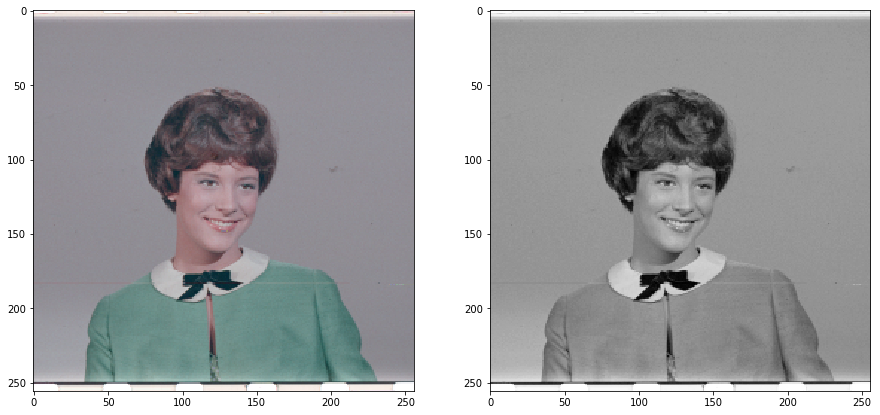

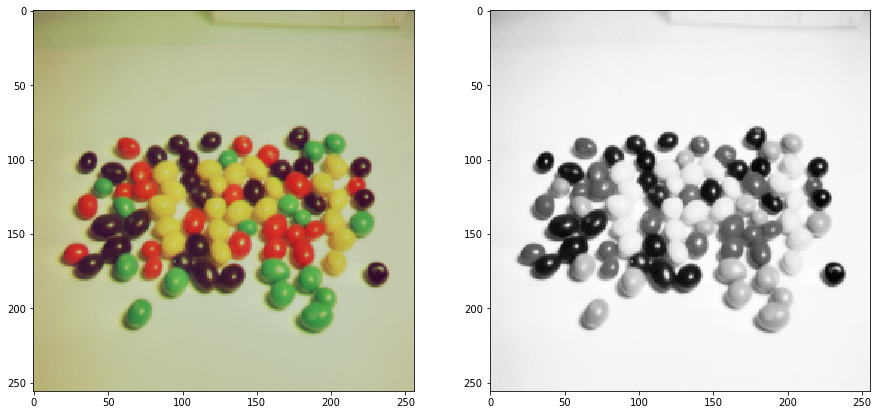

In [2]:

f, p = plt.subplots(1,2,figsize=(15,15))
p[0].imshow(io.imread("./misc/4.1.03.tiff"))
p[1].imshow(io.imread("./images/grey/img02.png"), cmap='Greys_r')

f, p = plt.subplots(1,2,figsize=(15,15))
p[0].imshow(io.imread("./misc/4.1.08.tiff"))
p[1].imshow(io.imread("./images/grey/img07.png"), cmap='Greys_r')

Noise is added in cells 2 and 3 of *script1.py*. Some example of noisy images are shown below. Note that noise is subtle, since we want to appreciate how barcodes change with it. Recall that barcodes (with the bottleneck distance as a metric) are stable to gaussian and poisson noise but not to salt and pepper.

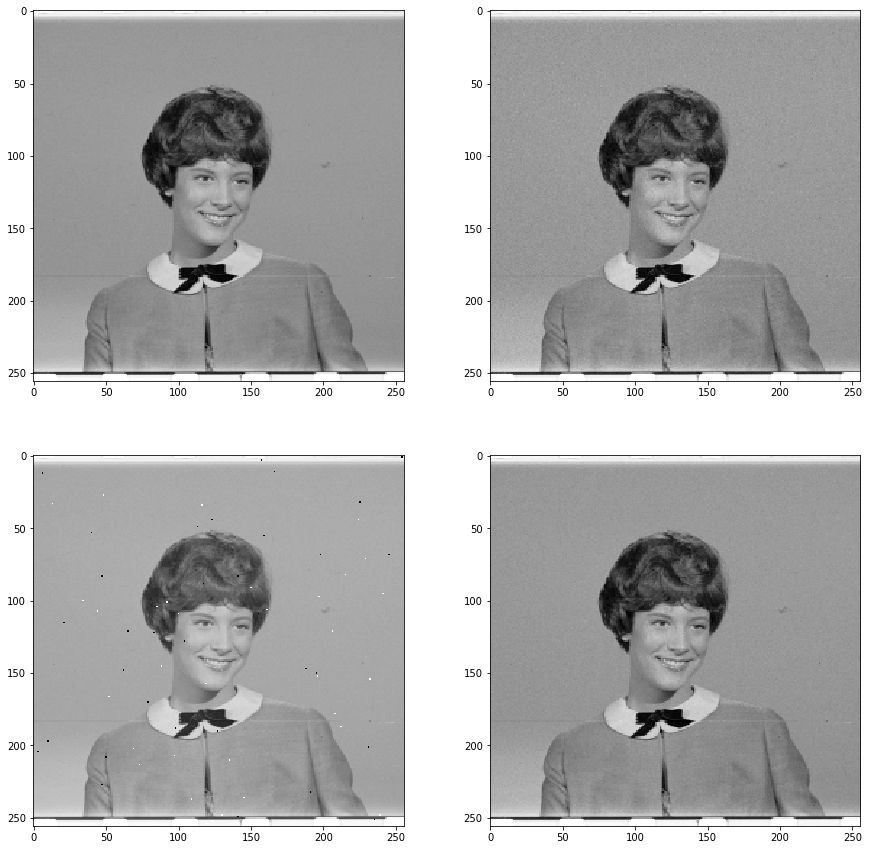

In [3]:
f, p = plt.subplots(2,2,figsize=(15,15))
p[0,0].imshow(io.imread("./images/grey/img02.png"), cmap='Greys_r')
p[0,1].imshow(io.imread("./images/gauss/gauss02.png"), cmap='Greys_r')
p[1,0].imshow(io.imread("./images/sandp/sandp02.png"), cmap='Greys_r')
p[1,1].imshow(io.imread("./images/poisson/poisson02.png"), cmap='Greys_r')


## Calculate barcodes

Lastly we calculate all persistent diagram and save them as a txt in the last cell of script1.py. We use the package [ripser](https://ripser.scikit-tda.org/) and [persim](https://persim.scikit-tda.org/) from [scikit-tda](https://scikit-tda.org/). Running it may take some minutes. These diagrams are are plotted as barcodes in script2.R using [TDA package](https://cran.r-project.org/web/packages/TDA/index.html).

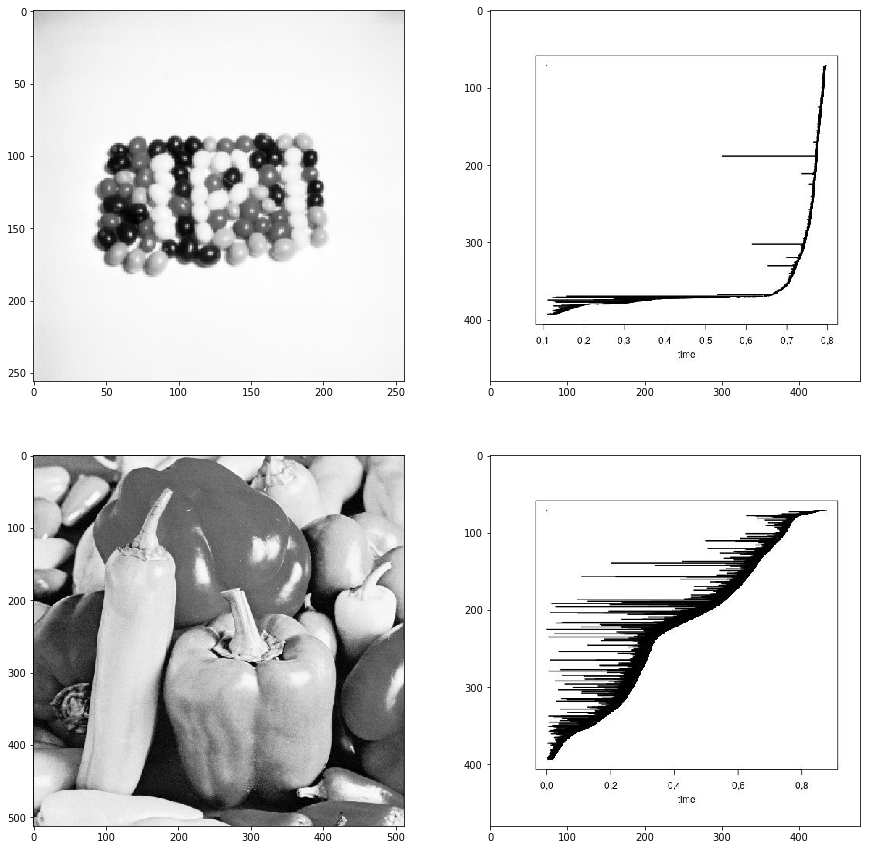

In [5]:

f, p = plt.subplots(2,2,figsize=(15,15))
p[0,0].imshow(io.imread("./images/grey/img06.png"), cmap='Greys_r')
p[0,1].imshow(io.imread("./diagrams_plot/grey/bar06.jpg"))
p[1,0].imshow(io.imread("./images/gauss/gauss12.png"), cmap='Greys_r')
p[1,1].imshow(io.imread("./diagrams_plot/grey/bar12.jpg"))



## Comparing barcodes

Betti, NES and Silhouette have the same aim but measure different features from the barcode. This mean that usually there is not a best option but the three of them may complement each other. For example, in some images like the following, the output of is extremely similar:

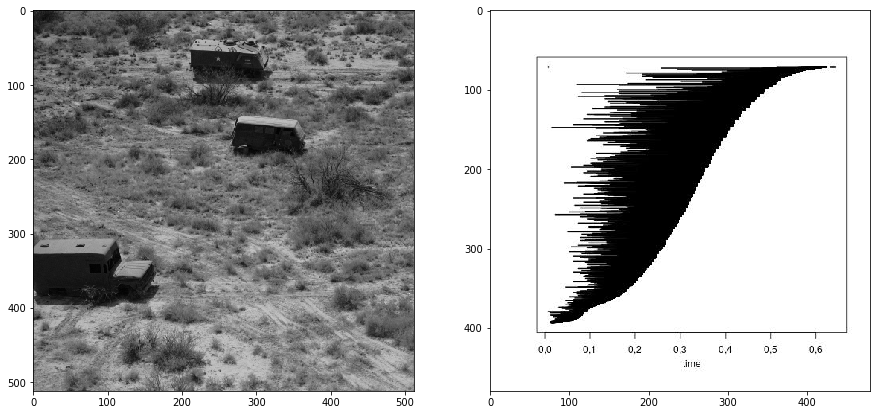

In [6]:
f, p = plt.subplots(1,2,figsize=(15,15))
p[0].imshow(io.imread("./images/grey/img29.png"), cmap='Greys_r')
p[1].imshow(io.imread("./diagrams_plot/grey/bar29.jpg"))

Text(0.5,1,'Silhouette p=2')

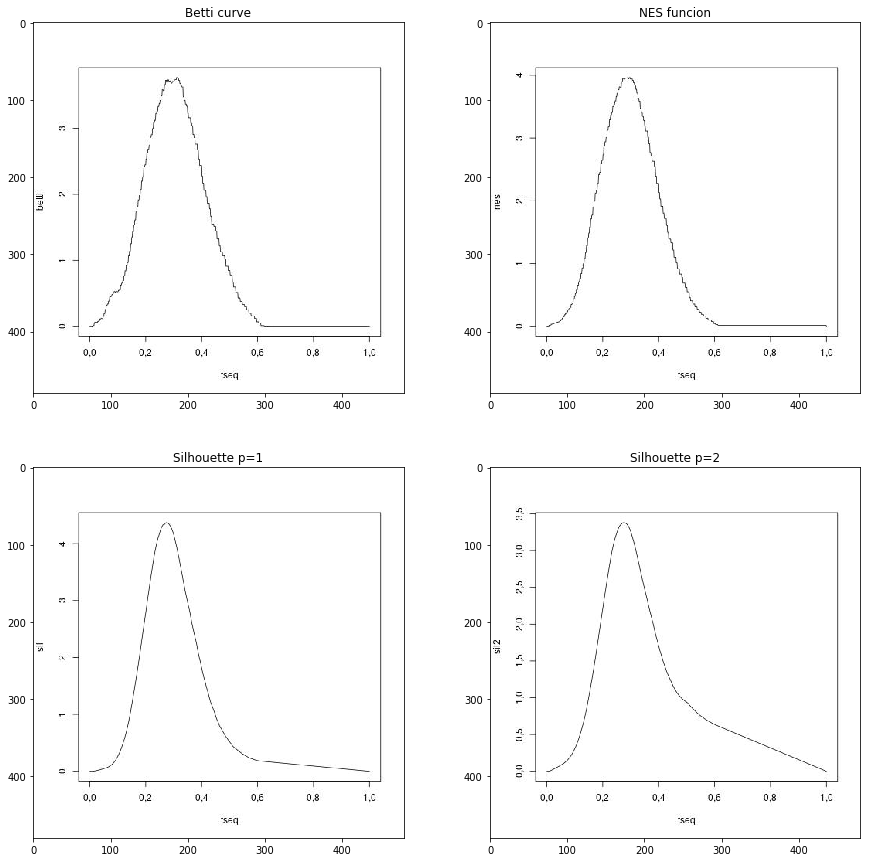

In [11]:
f, p = plt.subplots(2,2,figsize=(15,15))
p[0,0].imshow(io.imread("./betti/grey/img29.jpg"))
p[0,0].set_title('Betti curve')
p[0,1].imshow(io.imread("./nes/grey/img29.jpg"))
p[0,1].set_title('NES funcion')
p[1,0].imshow(io.imread("./silhouette_p1/grey/img29.jpg"))
p[1,0].set_title('Silhouette p=1')
p[1,1].imshow(io.imread("./silhouette_p2/grey/img29.jpg"))
p[1,1].set_title('Silhouette p=2')

But in this other case, outputs are pretty different

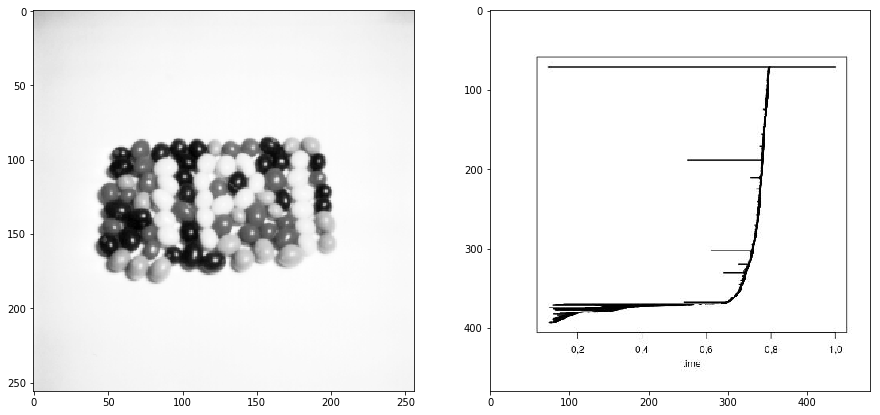

In [12]:
f, p = plt.subplots(1,2,figsize=(15,15))
p[0].imshow(io.imread("./images/grey/img06.png"), cmap='Greys_r')
p[1].imshow(io.imread("./diagrams_plot/grey/bar06.jpg"))

Text(0.5,1,'Silhouette p=2')

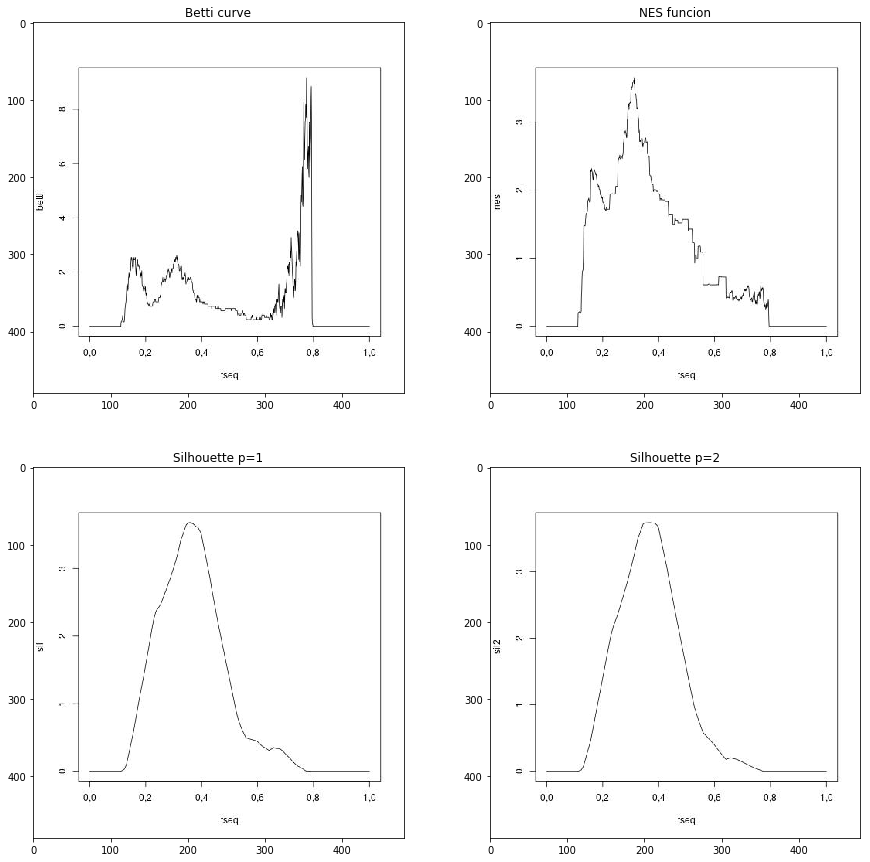

In [10]:
f, p = plt.subplots(2,2,figsize=(15,15))
p[0,0].imshow(io.imread("./betti/grey/img06.jpg"))
p[0,0].set_title('Betti curve')
p[0,1].imshow(io.imread("./nes/grey/img06.jpg"))
p[0,1].set_title('NES funcion')
p[1,0].imshow(io.imread("./silhouette_p1/grey/img06.jpg"))
p[1,0].set_title('Silhouette p=1')
p[1,1].imshow(io.imread("./silhouette_p2/grey/img06.jpg"))
p[1,1].set_title('Silhouette p=2')

An example of success using both betti and NES function in a classification task can be found in this [paper](https://arxiv.org/pdf/1905.08607.pdf). Where both function are used to classifying different types of skin  lesions pictured in a given image. In the following notebook we will see how sensitive they are to noise and their classification power.